Name Sarah Brannum

Labpartner(s) Miriam

In [1]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

**For today's lab you need to install the package cartopy**

In [2]:
# you can install packages here in a notebook with pip or conda, 
# or in the anaconda navigator in the environments tab (reccommended)

# pip install cartopy
# conda install cartopy

In [3]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Class 6.2

Today we will finish fiunction sharing and do more plotting

# Warmups 6.2

**W.1** (From Zach) Write some code that generates 15 random integers from 1-100. If the integers are divisible by 2 assign them to list "x" if they are divisible by three, assign them to list "y", if they are neither assign them to list "z". 

In [11]:
rand_list=np.random.randint(1,100,15)
print(rand_list)
x=[]
y=[]
z=[]
for value in rand_list:
    if value%2==0:
        x.append(value)
    elif value%3==0:
        y.append(value)
    else:
        z.append(value)
print(x)
print(y)
print(z)

[ 4 28  1 17 65 93 19 25 75 22  9 79 32 80 41]
[4, 28, 22, 32, 80]
[93, 75, 9]
[1, 17, 65, 19, 25, 79, 41]


**W.2** Plot your lists together in some sensible way. Zach suggests a histogram with different colors for each list

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1.  ,  2.56,  4.12,  5.68,  7.24,  8.8 , 10.36, 11.92, 13.48,
        15.04, 16.6 , 18.16, 19.72, 21.28, 22.84, 24.4 , 25.96, 27.52,
        29.08, 30.64, 32.2 , 33.76, 35.32, 36.88, 38.44, 40.  , 41.56,
        43.12, 44.68, 46.24, 47.8 , 49.36, 50.92, 52.48, 54.04, 55.6 ,
        57.16, 58.72, 60.28, 61.84, 63.4 , 64.96, 66.52, 68.08, 69.64,
        71.2 , 72.76, 74.32, 75.88, 77.44, 79.  ]),
 <BarContainer object of 50 artists>)

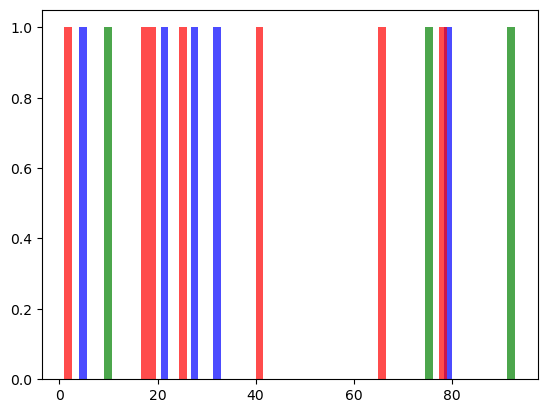

In [23]:
#plt.bar(rand_list,1)
plt.hist(x,50,color='blue',alpha=0.7,label='x')
plt.hist(y,50,color='green',alpha=0.7,label='y')
plt.hist(z,50,color='red',alpha=0.7,label='z')

# Lecture 6.2

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - continued

### Questions

### Cartopy

Let's take the data we used last time and make the plot publication ready

There are a number of differnt map projections available in Cartopy.  https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

C:\Users\sbrann5\AppData\Local\anaconda3again\envs\OCS4001\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


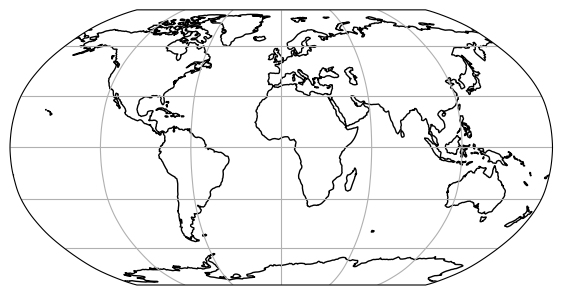

In [24]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

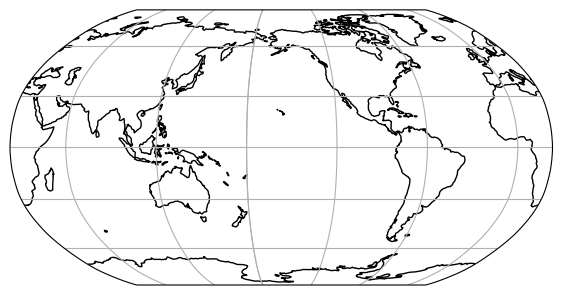

In [25]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the map to 203 degrees East
ax.coastlines(resolution='110m')
ax.gridlines()

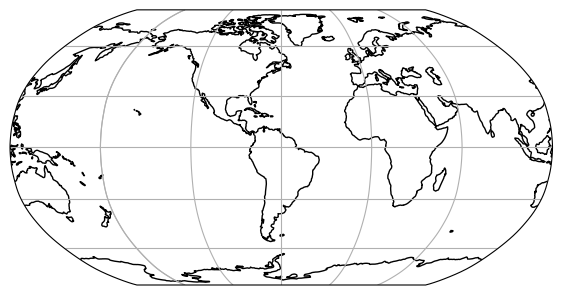

In [27]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300)) #can also do central_longitude=-60
ax.coastlines(resolution='110m')
ax.gridlines()

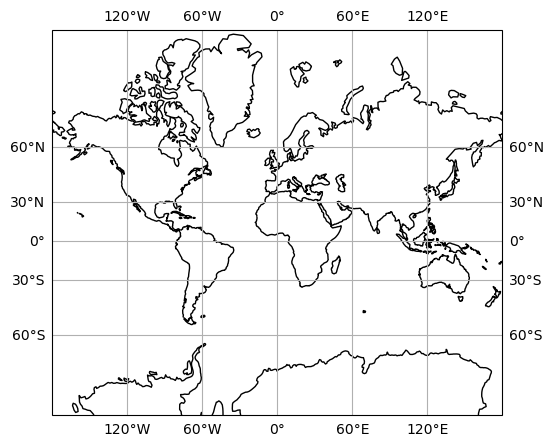

In [28]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

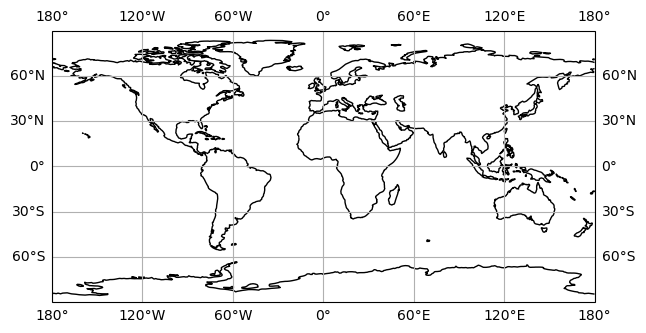

In [29]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

# -60 (60 W) is the same as 300 E (360 degrees in total 360-60W = 300E)

How do I zoom in?

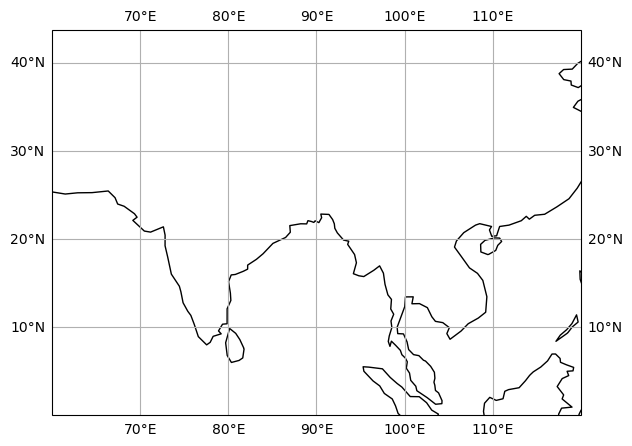

In [32]:
# let's zoom in to S Asia
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([60,120,0,40]) # set the limits of the plot
#set xmin, xmax, ymin, ymax
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)


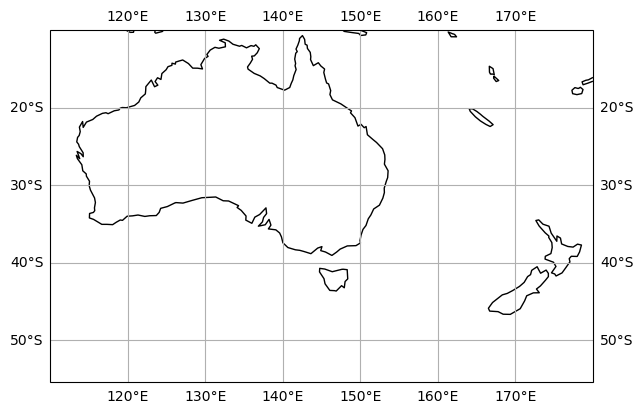

In [69]:
#zoom into australia
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([110,180,-10,-50]) # set the limits of the plot
#set xmin, xmax, ymin, ymax
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

**Moving back to the Gulf of Mexico, we want to set the lat and lon range to match our HYCOM data. How do we find this?**

In [38]:
#insert path or url to file here

file = 'http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.01/reanalysis/data/2019/023_archv.2019_291_05_3z.nc'


In [39]:
gom_data = xr.open_dataset(file, decode_times=False)

In [40]:
gom_data

<xarray.Dataset>
Dimensions:     (Longitude: 2101, Latitude: 1537, Depth: 40, MT: 1)
Coordinates:
  * Longitude   (Longitude) float32 -98.0 -97.99 -97.98 ... -77.02 -77.01 -77.0
  * Latitude    (Latitude) float32 18.09 18.1 18.11 18.12 ... 31.94 31.95 31.96
  * Depth       (Depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * MT          (MT) float64 4.339e+04
    Date        (MT) float64 ...
Data variables:
    u           (MT, Depth, Latitude, Longitude) float32 ...
    v           (MT, Depth, Latitude, Longitude) float32 ...
    w_velocity  (MT, Depth, Latitude, Longitude) float32 ...
    water_temp  (MT, Depth, Latitude, Longitude) float32 ...
    salinity    (MT, Depth, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           HYCOM
    source:                          HYCOM archive
    experiment:                      02.0
    history:                         archv2ncdf3z
    DODS_EXTRA.Unlimited_Dimension:  MT

In [41]:
# let's remember what our data looked like, pick a variable to plot

In [49]:
lat_min=gom_data.Latitude.min()

In [50]:
lat_max=gom_data.Latitude.max()

In [51]:
lon_min=gom_data.Longitude.max()

In [52]:
lon_max=gom_data.Longitude.min()

C:\Users\sbrann5\AppData\Local\anaconda3again\envs\OCS4001\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


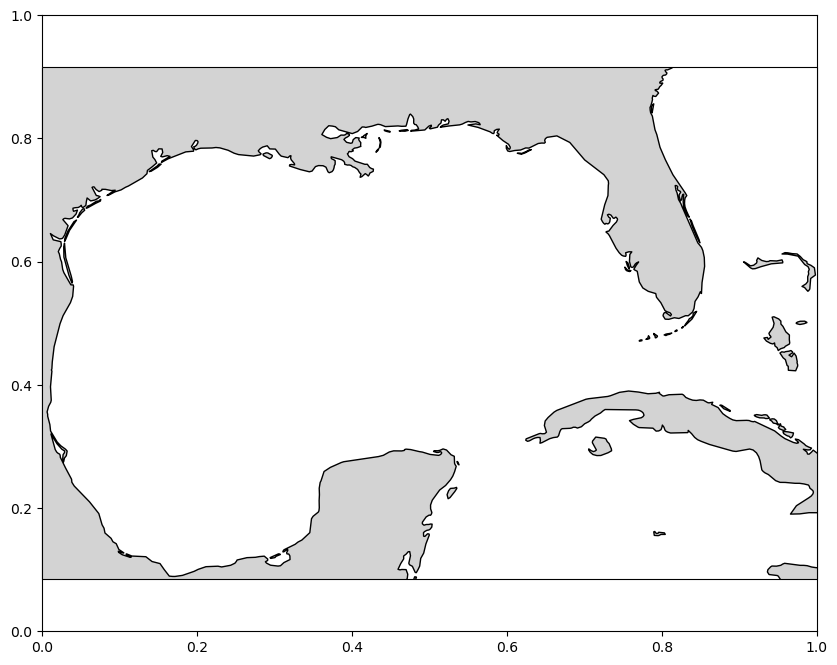

In [53]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min,lon_max,lat_min,lat_max]) 
#ax.set_extent([]) #play around later

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

Now let's add some data

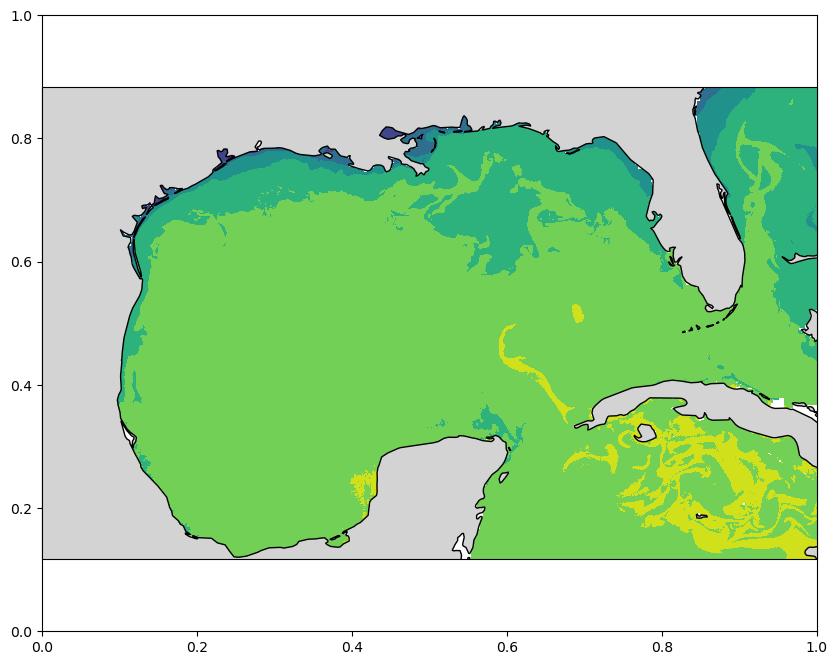

In [61]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.water_temp[0,0,:,:]

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call
    

Now I'm going to take a bunch of features from Victoria's demo (in github as Hycom-CartopyDemo) and add them in to make a publication ready plot

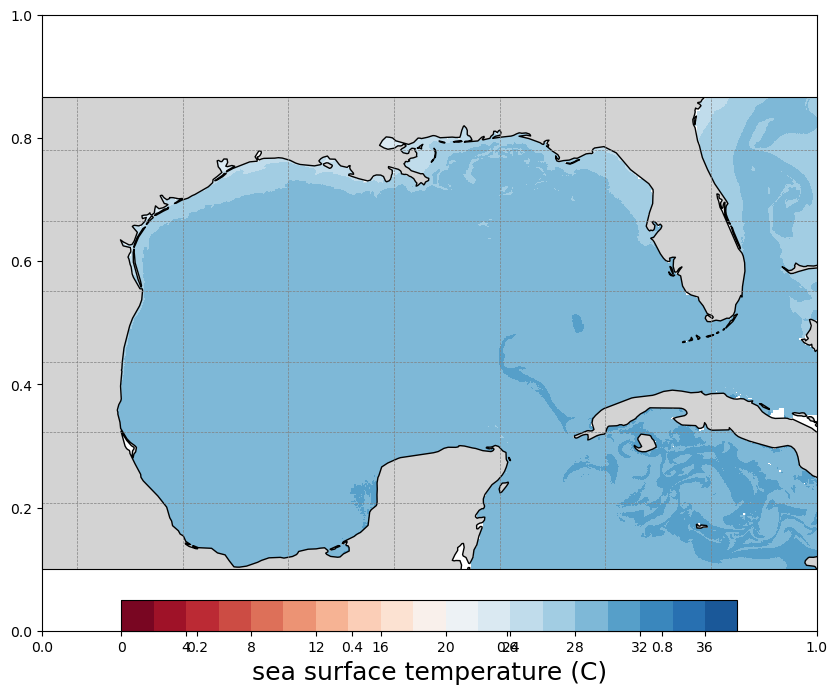

In [77]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.water_temp[0,0,:,:]

#Contours the data on tho the map projection
step = np.arange(0,40,2)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu', 
                vmin = 0,vmax = 40,levels = step) # projection is needed in every plot call
    
# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("sea surface temperature" +' (C)', size = 18)


# ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
#     #and sets the grid lines on the graph
# ##Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')
gl.xlabels_top = True    
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 16}
gl.ylabel_style = {'size' : 16}

## Lab 6.2

**E.0** Finish Lab 6.1 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 3-4. Let me know if this feels like a good pace

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

**E.3** Make a plot of a different variable for the HYCOM data. Play around with colormaps and contourlines to make it your own. Post your plot on the class slack #random channel

### This week's project:

**E.4** Download some data from the ISIMIP data archive (https://data.isimip.org/) and plot it using cartopy. ISIMIP provides bias-corrected data for past and future climate simulations used for impacts studies world wide. Let's start with some maximum atmospheric surface temperature data in the historical period (1850-2014 for CMIP6). We want climate forcing data for ISIMIP3b, which are the lastest (CMIP6) climate projections. 

* https://data.isimip.org/search/tree/ISIMIP3b/InputData/climate/
* Click atmopsheric forcing
* Click GFDL... This is one of NOAA-GFDL's climate models (ESM4)
* Click historical

All of the variable names are in CMIP lingo. Sadly, there is no easy cheat sheet. But you want tas, which is "temperature of air at surface". Let's use the tasmax, the maximum daily surface air temperature
* Click tasmax
* Click files to see all the available files.
  
Here you have a choice, you can download an etire file (note the size) or you can use the "configure download" button, which has subsetting by space or country, as well as time opitons. You can click on a file name to see more info.
* Click on "download file" for the 1851-1860 file. Just grab the whole file, it will take a minute to download.
* Load up the data into xarray and plot the maximum of this dataset (so max over the decade for each gridcell. You just use a max function for this, no loops needed).
* Plot using cartopy to make it pretty. Put some sensible lables on it, etc. Maybe add some country boundaries.

In [4]:
data_1851 = xr.open_dataset(r"C:\Users\sbrann5\OneDrive - Louisiana State University\May13_backup\Classwork\python_course\lab6.2\gfdl-esm4_r1i1p1f1_w5e5_historical_tasmax_global_daily_1851_1860.nc", decode_times=False)

#data_1851


In [7]:
data_1851_max=data_1851.max(dim='time')
print(data_1851_max)
data_1851_max.to_netcdf('data_1851_max.nc')

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 274.9 274.9 274.9 274.9 ... 258.2 258.3 258.3


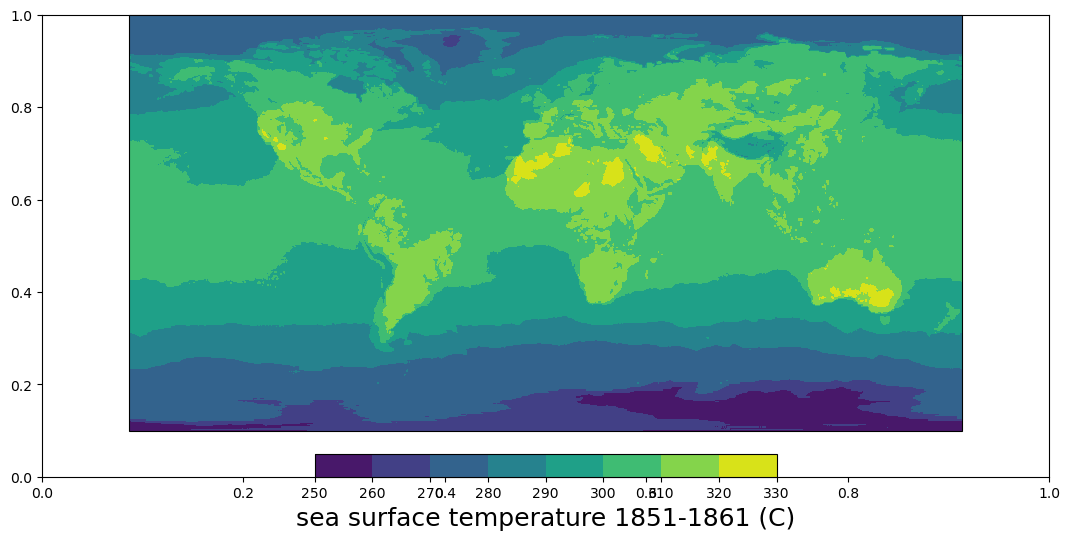

In [6]:
fig, ax = plt.subplots(figsize =(13,6))  
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([260,282, 18.11, 31.5]) 

# let's fill in the following:
x = data_1851_max.lon
y = data_1851_max.lat
var =  data_1851_max.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("air temperature 1851-1861" +' (C)', size = 18)

**E.5** Now make a second plot using ISIMP data for a future climate projection. Following the same steps as above, get the GFDL tasmax data for the future climate scenario SSP3-7.0 (higher emissions scenario) for 2051-2060. Again, calculate the maximum at each gridpoint for this data set. This is the future maximum daily temperature for that decade. Make your plot nice.

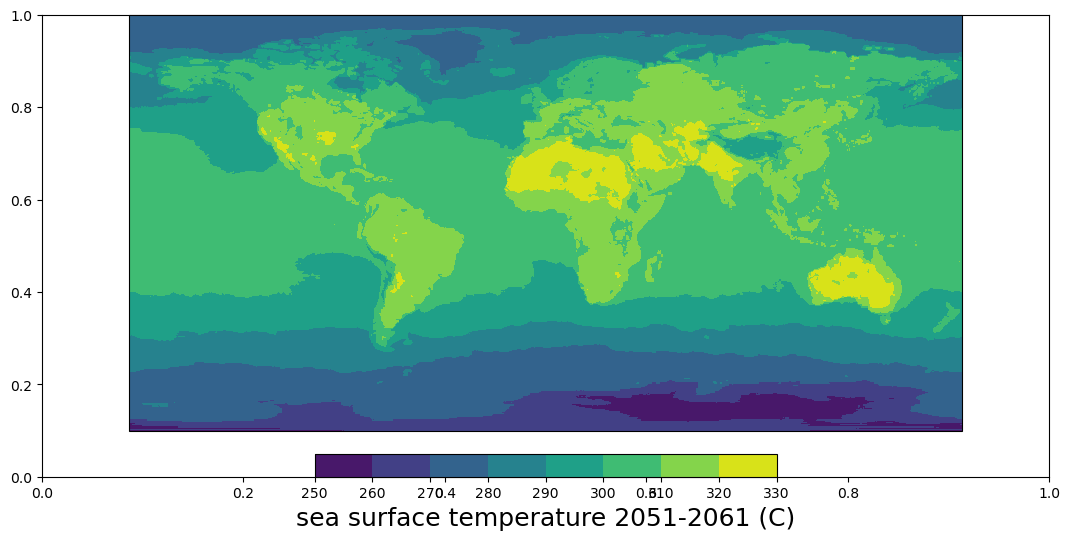

In [8]:
data_2051 = xr.open_dataset(r"C:\Users\sbrann5\OneDrive - Louisiana State University\May13_backup\Classwork\python_course\lab6.2\gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmax_global_daily_2051_2060.nc", decode_times=False)
data_2051_max=data_2051.max(dim='time')
data_2051_max.to_netcdf('data_2015_max.nc')

fig, ax = plt.subplots(figsize =(13,6))  
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
#land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                   # edgecolor='black',
                                   # facecolor='lightgrey')
#ax.add_feature(land_50m)

# let's fill in the following:
x = data_2051_max.lon
y = data_2051_max.lat
var =  data_2051_max.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("air temperature 2051-2061" +' (C)', size = 18)

**E.6** Now plot the anomaly between the two, 2050's - 1850's. Use a diverging colormap (light in the middle), centered on zero. What is the outlook for your country of orgin? Answer in full sentances with specific numbers.

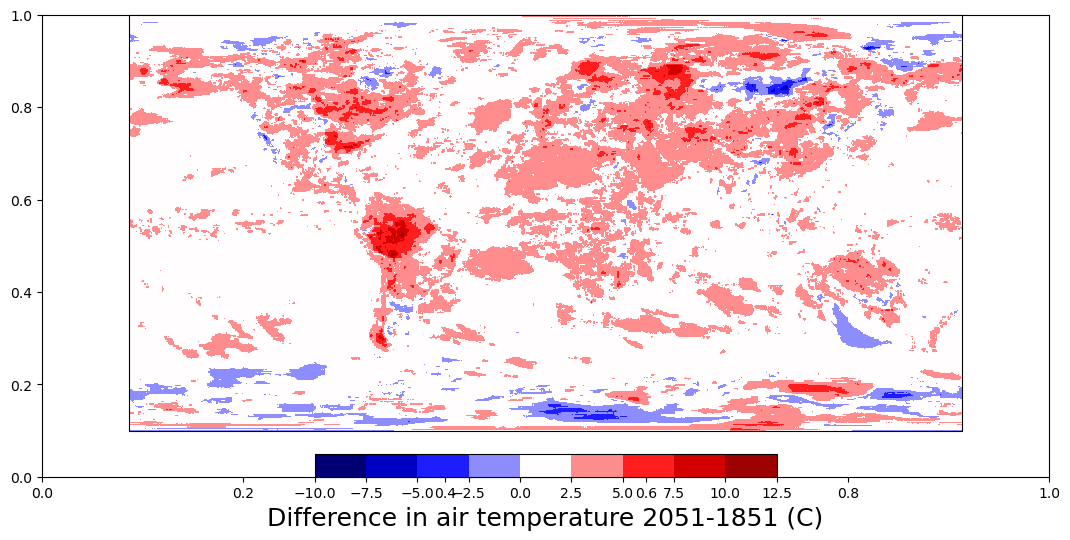

In [12]:
data_2051_max=xr.open_dataset(r"C:\Users\sbrann5\OneDrive - Louisiana State University\May13_backup\Classwork\python_course\lab6.2\data_2015_max.nc")
data_1851_max=xr.open_dataset(r"C:\Users\sbrann5\OneDrive - Louisiana State University\May13_backup\Classwork\python_course\lab6.2\data_1851_max.nc")

difference=data_2051_max-data_1851_max

fig, ax = plt.subplots(figsize =(13,6))  
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([260,282, 18.11, 31.5]) 

# let's fill in the following:
x = difference.lon
y = difference.lat
var =  difference.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(),cmap='seismic') # projection is needed in every plot call

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Difference in air temperature 2051-1851" +' (C)', size = 18)

The east coast of the US around North Carolina seems to have an increase in air temperature upwards of 10 degrees celsius over the past 200 years, indicating drastic temperature changes due to increased carbon emissions.

**E.7** How could you potentially use this kind of data (future climate projections) in your research? Do some brainstorming. Write down your thoughts here.

Future climate projections would be useful to predict the climate and which species of vegetation are able to exist given the environment. Additionally, differences in global climate can help model future weather events, which play a role in the hydrology of the entire system.